In [73]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import wave
import librosa.display
import sklearn
import sys, os
warnings.filterwarnings('ignore')
from IPython.display import Audio

In [38]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

"""from clean import Clean
from eda import EDA
cleaning_audios = Clean()"""


'from clean import Clean\nfrom eda import EDA\ncleaning_audios = Clean()'

In [54]:
train_dataset_location = '../data/train/'
train_wav_location = os.path.join(train_dataset_location, 'wav/')
train_changed_wav_location = os.path.join(train_dataset_location, 'converted_wavs/')
train_txt_location = os.path.join(train_dataset_location, 'trsTrain.txt')
test_dataset_location = 'test/' 
lexicon_location = 'train/'

In [56]:
train_file_names = os.listdir(train_wav_location)
train_wav_paths = [ os.path.join(train_wav_location, file_name)
                    for file_name in train_file_names]
print(f"There are {len(train_wav_paths)} Amharic wav files in the training set")

There are 10875 Amharic wav files in the training set


In [57]:
def tran_loader(filename):
    name_to_text = {}
    with open(filename, encoding="utf-8")as f:
        f.readline()
        for line in f:
            name = line.split("</s>")[1]
            name = name.replace('(', '')
            name = name.replace(')', '')
            name = name.replace('\n', '')
            name = name.replace(' ', '')
            text = line.split("</s>")[0]
            text = text.replace("<s>", "")
            name_to_text[name] = text
        return name_to_text

In [58]:
transcription = tran_loader(train_txt_location)

In [45]:
transcription

{'tr_2_tr01002': ' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል ',
 'tr_3_tr01003': ' በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ የ ተገናኙ ት መድን ና ሙገር ሲሚንቶ ሲ ሆኑ በ ውጤቱ ም ሶስት ለ ሶስት ተለያይ ተዋል ',
 'tr_4_tr01004': ' ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው ',
 'tr_5_tr01005': ' ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች ',
 'tr_6_tr01006': ' ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት ',
 'tr_7_tr01007': ' እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው ',
 'tr_8_tr01008': ' እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ ',
 'tr_9_tr01009': ' አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው ',
 'tr_10_tr01010': ' ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር ',
 'tr_11_tr01011': ' ከ የ አቅጣጫ ው እየ ደረሷቸው ያሉ መረጃዎች አሳሳቢ ችግሮች እየ ደረሱ መሆናቸው ን የሚ ጠቁሙ መሆናቸው ን ፕሬዝዳንቱ ተናግረ ዋል ',
 'tr_12_tr01012': ' ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም ',
 'tr_13_tr01013': ' ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ 

In [59]:
import wave, array
def change_channel_to_stereo(file1, output):
    try:
        ifile = wave.open(file1)
        print(ifile.getparams())
        # (1, 2, 44100, 2013900, 'NONE', 'not compressed')
        (nchannels, sampwidth, framerate, nframes, comptype, compname) = ifile.getparams()
        assert comptype == 'NONE'  # Compressed not supported yet
        array_type = {1:'B', 2: 'h', 4: 'l'}[sampwidth]
        left_channel = array.array(array_type, ifile.readframes(nframes))[::nchannels]
        ifile.close()

        stereo = 2 * left_channel
        stereo[0::2] = stereo[1::2] = left_channel

        ofile = wave.open(output, 'w')
        ofile.setparams((2, sampwidth, framerate, nframes, comptype, compname))
        print(ofile.getnchannels())
        ofile.writeframes(stereo.tobytes())
        ofile.close()
        return ofile.getnchannels()
    except Exception as e:
        print(e)

In [60]:
def resize_audio(audio: np.array, size: int) -> np.array:
        
        resized = librosa.util.fix_length(audio, size, axis=1)
        print(f"Audio resized to {size} samples")
        return resized

In [61]:
# we will use the first wav file to visualize its characteristics
#librosa load returns by default time-series as numpy array and with the default sample rate of 22KHZ so we just changed it to 44kHZ
samples, sample_rate = librosa.load(train_wav_location+'tr_1_tr01001.wav' , sr=44100)
print(samples)
print(sample_rate)

[-0.00502738 -0.00588078 -0.00577551 ... -0.00516981 -0.00347923
  0.        ]
44100


In [62]:
# Top five mono files converted to stereo
for file_name in train_file_names[0:10]:
    change_channel_to_stereo(os.path.join(train_wav_location, file_name) , os.path.join(train_changed_wav_location, file_name))
     

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=145408, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=90112, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=98304, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92160, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86016, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=106496, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=104448, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=88064, comptype='NONE', compname='not compressed')
2
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nfram

In [63]:
ipd.Audio(samples, rate=sample_rate)

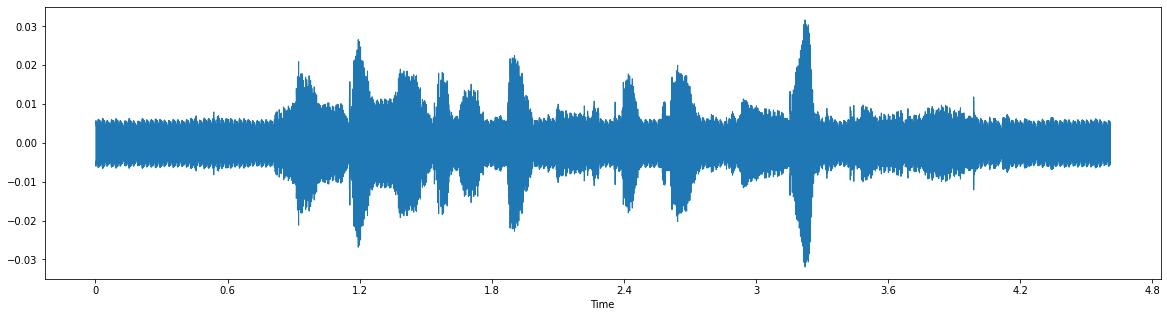

In [64]:
# Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(samples, sr=sample_rate)
plt.show()

### Convert time domain into frequency domain
- `Fourier Transform is a mathematical operation that changes the domain (x-axis) of a signal from time to frequency`
- `The Fourier Transform can, in fact, speed up the training process of convolutional neural networks`

- `the Fast Fourier Transform (FFT) is an algorithm that determines Discrete Fourier Transform of an input significantly faster than computing it directly. In computer science lingo, the FFT reduces the number of computations needed for a problem of size N from O(N^2) to O(NlogN)`

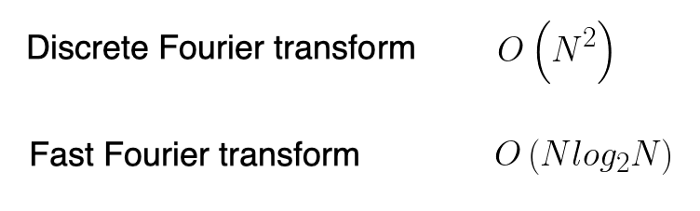

In [66]:
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    - FFT
    
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

spe_samples, frequency = spectrogram(samples)
print(frequency)
print(spe_samples)

[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625 0.046875
 0.0546875 0.0625    0.0703125 0.078125  0.0859375 0.09375   0.1015625
 0.109375  0.1171875 0.125     0.1328125 0.140625  0.1484375 0.15625
 0.1640625 0.171875  0.1796875 0.1875    0.1953125 0.203125  0.2109375
 0.21875   0.2265625 0.234375  0.2421875 0.25      0.2578125 0.265625
 0.2734375 0.28125   0.2890625 0.296875  0.3046875 0.3125    0.3203125
 0.328125  0.3359375 0.34375   0.3515625 0.359375  0.3671875 0.375
 0.3828125 0.390625  0.3984375 0.40625   0.4140625 0.421875  0.4296875
 0.4375    0.4453125 0.453125  0.4609375 0.46875   0.4765625 0.484375
 0.4921875 0.5       0.5078125 0.515625  0.5234375 0.53125   0.5390625
 0.546875  0.5546875 0.5625    0.5703125 0.578125  0.5859375 0.59375
 0.6015625 0.609375  0.6171875 0.625     0.6328125 0.640625  0.6484375
 0.65625   0.6640625 0.671875  0.6796875 0.6875    0.6953125 0.703125
 0.7109375 0.71875   0.7265625 0.734375  0.7421875 0.75      0.7578125
 0.765625  0.77343

In [67]:
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()
    # plt.savefig('spectogramfeature.png')

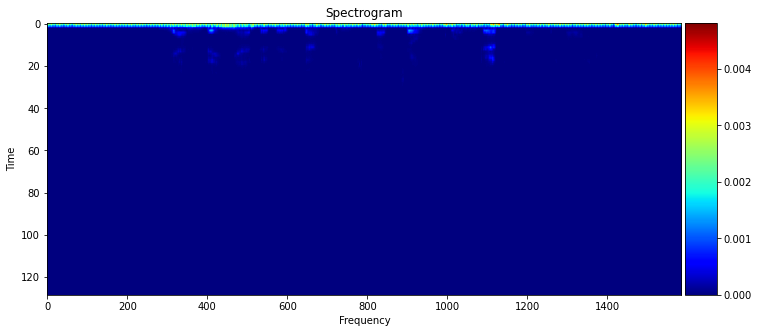

In [68]:
plot_spectrogram_feature(spe_samples)

#### The Short-time Fourier transform (STFT)
- is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time.
- Resolution is its key Importance

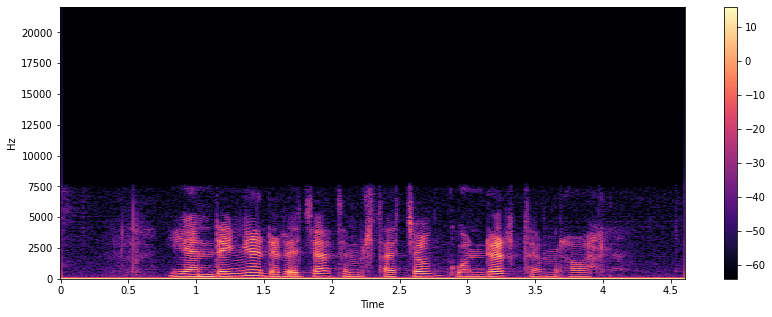

In [69]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()
# plt.savefig('specshow.png')

### Visualization of features of audio Spectral 

**`spectral Centroid (Center frequencies)`**

In [70]:
spectral_centroids = librosa.feature.spectral_centroid(
    samples, sr=sample_rate)[0]

spectral_centroids.shape

(397,)

In [71]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

<Figure size 864x288 with 0 Axes>

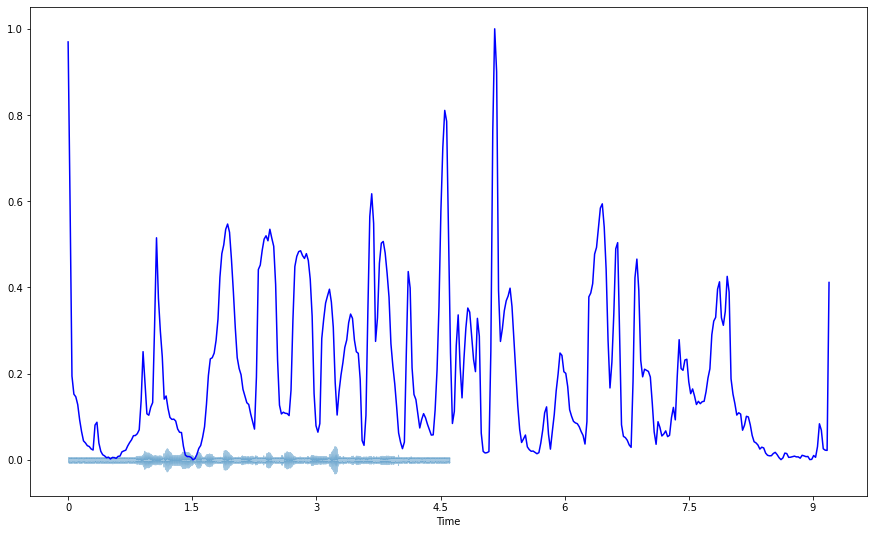

In [74]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(15, 9))
librosa.display.waveshow(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
plt.show()

**`Spectral rolloff`**

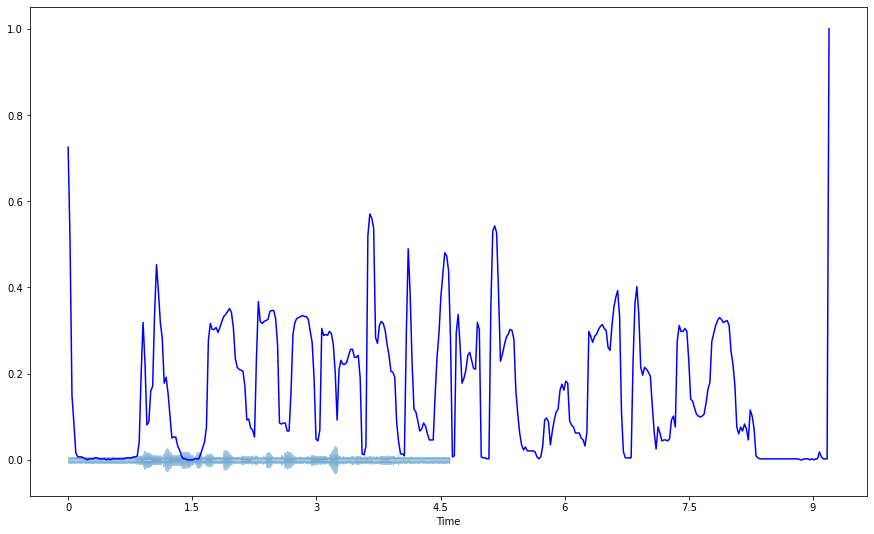

In [76]:
spectral_rolloff = librosa.feature.spectral_rolloff(
    samples+0.01, sr=sample_rate)[0]
# print(spectral_rolloff)
plt.figure(figsize=(15, 9))
librosa.display.waveshow(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='b')
plt.show()

**`Spectral Bandwidth`**

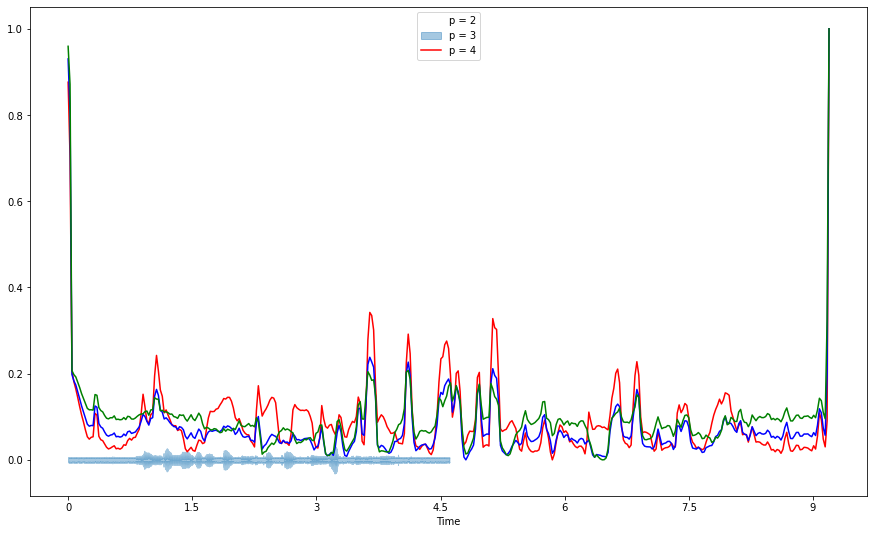

In [80]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(
    samples+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(
    samples+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(
    samples+0.01, sr=sample_rate, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveshow(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='b')
plt.plot(t, normalize(spectral_bandwidth_4), color='g')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.show()

### Data Augmentation by Time shifting

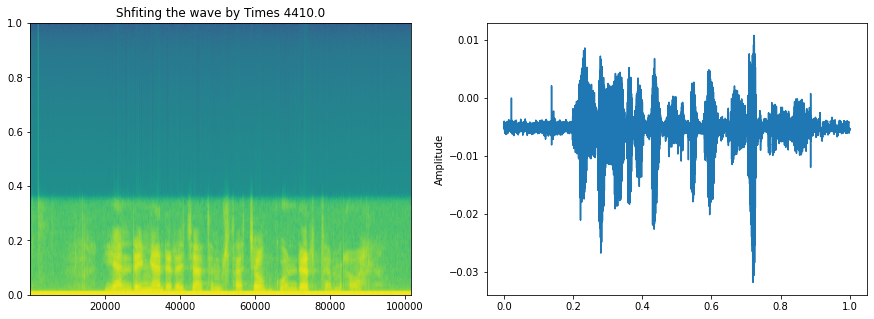

In [86]:
def plot_spec(data: np.array, sr: int) -> None:
    '''
    Function for plotting spectrogram along with amplitude wave graph
    '''

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
    ax[0].specgram(data, Fs=2)
    ax[1].set_ylabel('Amplitude')
    ax[1].plot(np.linspace(0, 1, len(data)), data)
    # fig.savefig('spectogramamplitude.png')
wav_roll = np.roll(samples, int(sample_rate/10))
plot_spec(data=wav_roll, sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)

In [82]:
class AugmentAudio:
    def __init__(self) -> None:
        pass

    def add_noise(self, data: np.array, noise_factor: float) -> np.array:
        noise = np.random.randn(len(data))
        augmented_data = data + noise_factor * noise
        augmented_data = augmented_data.astype(type(data[0]))

        return augmented_data

    def add_time_shift(self,
                       data: np.array,
                       sampling_rate: int,
                       shift_max: float,
                       shift_direction: str) -> np.array:
        shift = np.random.randint(sampling_rate * shift_max)
        if shift_direction == 'right':
            shift = -shift
        elif shift_direction == 'both':
            direction = np.random.randint(0, 2)
            if direction == 1:
                shift = -shift
        augmented_data = np.roll(data, shift)
        if shift > 0:
            augmented_data[:shift] = 0
        else:
            augmented_data[shift:] = 0

        return augmented_data
    
    def change_pitch(self, data, sampling_rate, pitch_factor):
        return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

    def change_speed(self, data, speed_factor):
        return librosa.effects.time_stretch(data, speed_factor)
audio_augmenter = AugmentAudio()

**`Adding noise`**

In [ ]:
noise_added = audio_augmenter.add_noise(samples, noise_factor=0.0001)
librosa.display.waveshow(noise_added, sr=sample_rate)
ipd.Audio(data=noise_added, rate=sample_rate)

In [3]:
#Display  samples and sample_rate 
rain_dataset_location = 'train/'
rain_wav_location = os.path.join(train_dataset_location, 'wav/')
train_file_names = os.listdir(train_wav_location)
train_audio_path = '../data_test/swahili_train_wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part3.wav'
samples, sample_rate = librosa.load(train_audio_path)

print(samples)
print(sample_rate)

[ 0.02666823  0.03076     0.02397061 ... -0.14377044 -0.1552949
 -0.09687205]
22050


In [4]:
#audio, rate=librosa.load('C:/Users/dell/Downloads/Compressed/AMHARIC/data/train/wav/tr_56_tr01056.wav')

In [5]:
ipd.Audio(samples, rate=sample_rate)

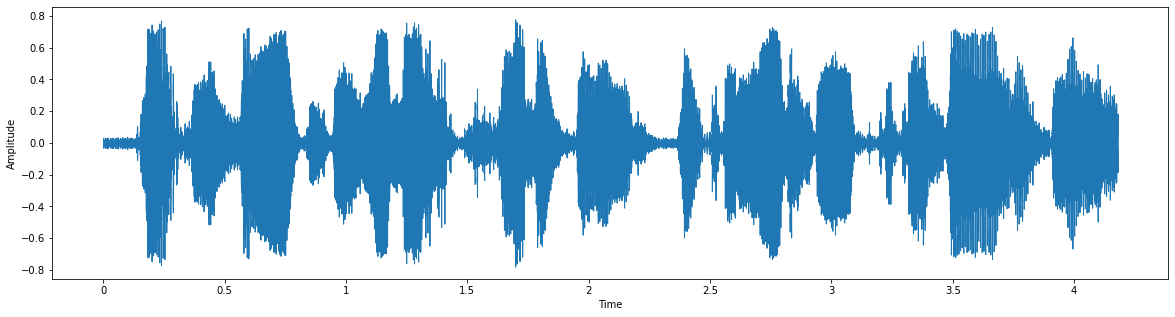

In [6]:
#plot our sample wav file 
%matplotlib inline

#Plot the signal:
plt.figure(figsize=(20, 5))
plt.xlabel("Time")
plt.ylabel('Amplitude')
librosa.display.waveshow(samples, sr=sample_rate)

In [7]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [8]:
spe_samples,frequency=spectrogram(samples)

In [9]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [10]:
spe_samples

array([[1.36373824e-02, 1.68458917e-02, 3.84563660e-02, ...,
        1.05248268e-01, 4.88198083e-03, 1.22208309e-01],
       [2.07464198e-02, 2.56179762e-02, 3.76750487e-02, ...,
        7.91384135e-01, 3.63697518e-01, 7.31460708e-01],
       [1.80384582e-03, 1.09525856e-03, 2.69785761e-03, ...,
        1.14885237e+00, 4.42945456e-02, 6.15300287e-01],
       ...,
       [1.66475885e-15, 6.77365859e-17, 3.61396856e-16, ...,
        2.86604758e-15, 8.97511061e-16, 1.23193303e-15],
       [1.84672300e-15, 6.86886476e-18, 8.46600268e-18, ...,
        1.01819342e-14, 1.34004315e-15, 8.61738275e-15],
       [9.11512277e-16, 3.54341144e-17, 7.12756158e-17, ...,
        7.20771123e-16, 2.83362722e-16, 1.69225108e-15]])

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [12]:
#function that load text file and change it to Dictionary 
def t_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
          line = line.strip()
          alist = line.split(' ', 1)
          key, values = alist[0], alist[1:]
          str1 = ''.join(str(e) for e in values)
          name_to_text[key] = str1
  #print(values)
  return name_to_text

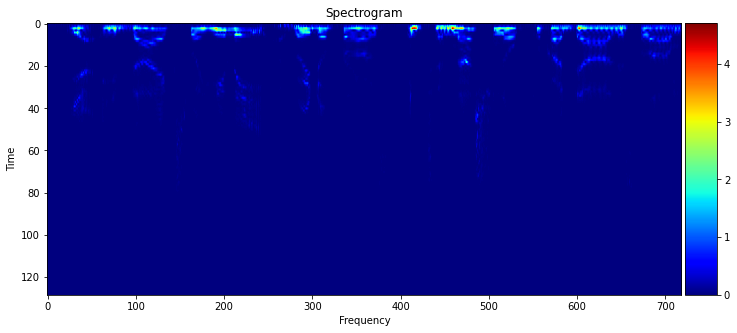

In [13]:
plot_spectrogram_feature(spe_samples)

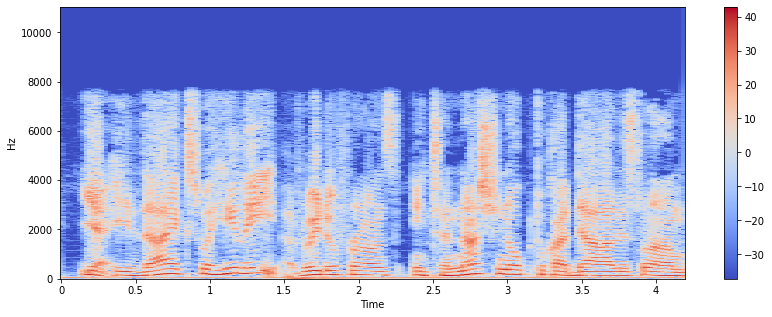

In [14]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [15]:
transcription=t_loader("../data_test/text_train_sw.txt")
transcription

{'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100\tyanayo': 'andaliwa nami pendo pondo idhaa ya kiswahili',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101\tinayokutangazia': 'moja kwa moja kutoka jijini dar es salaam tanzania',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102\tjuma': 'hili bara la afrika limeshuhudia raia wa nchi za niger',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103\twakipiga': 'kura ya maoni ilikufanya mabadiliko ya',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104\tkule': 'abidjan raia wa jiji hilo',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part105\twalipata': 'fursa ya kutumia haki yao ya msingi',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part106\twaziri': 'mkuu wa zamani alasane watara',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part107\tna': 'rais aliyetangulia henry ko

### mono to stereo conversion

In [18]:
import wave, array
def change_channel_to_stereo(file1, output):
    try:
        ifile = wave.open(file1)
        print(ifile.getparams())
        # (1, 2, 44100, 2013900, 'NONE', 'not compressed')
        (nchannels, sampwidth, framerate, nframes, comptype, compname) = ifile.getparams()
        assert comptype == 'NONE'  # Compressed not supported yet
        array_type = {1:'B', 2: 'h', 4: 'l'}[sampwidth]
        left_channel = array.array(array_type, ifile.readframes(nframes))[::nchannels]
        ifile.close()

        stereo = 2 * left_channel
        stereo[0::2] = stereo[1::2] = left_channel

        ofile = wave.open(output, 'w')
        ofile.setparams((2, sampwidth, framerate, nframes, comptype, compname))
        print(ofile.getnchannels())
        ofile.writeframes(stereo.tobytes())
        ofile.close()
        return ofile.getnchannels()
    except Exception as e:
        print(e)

In [ ]:
for file_name in train_file_names[0:10]:
    change_channel_to_stereo(os.path.join(train_wav_location, file_name) , os.path.join(train_changed_wav_location, file_name))

In [20]:
change_channel_to_stereo("../data_test/swahili_train_wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav", "../gen_data/SWH-05-20101106_16k2.wav")

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71520, comptype='NONE', compname='not compressed')
2


2

### Sampling Rate Standardization

In [21]:
from scipy.io import wavfile as wav

In [22]:
## Read the stereo dat asampling
fullpath  = '../gen_data/SWH-05-20101106_16k2.wav'

librosa_load, librosa_sampling_rate = librosa.load(fullpath)

scipy_sampling_rate, scipy_load = wav.read(fullpath)

## convert the sampling rate
print('original sample rate:',scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('\n')
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))

original sample rate: 16000
converted sample rate: 22050


original wav file min~max range: -24720 ~ 24457
converted wav file min~max range: -0.7695227 ~ 0.7539317


In [23]:
###   data befor and after sampling rate conversion

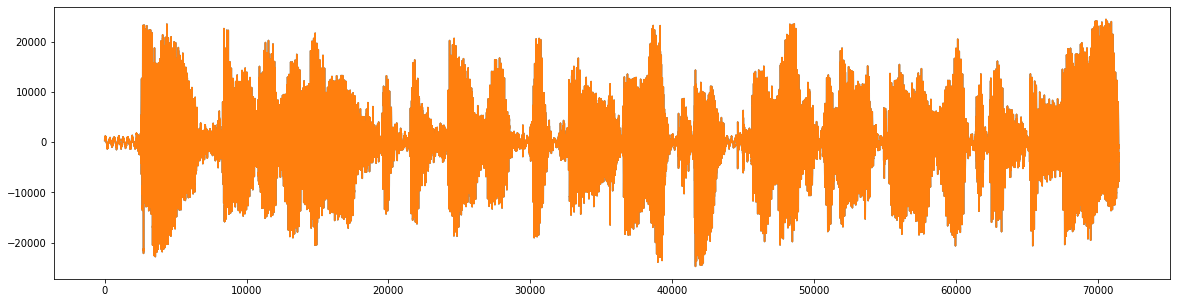

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(scipy_load)

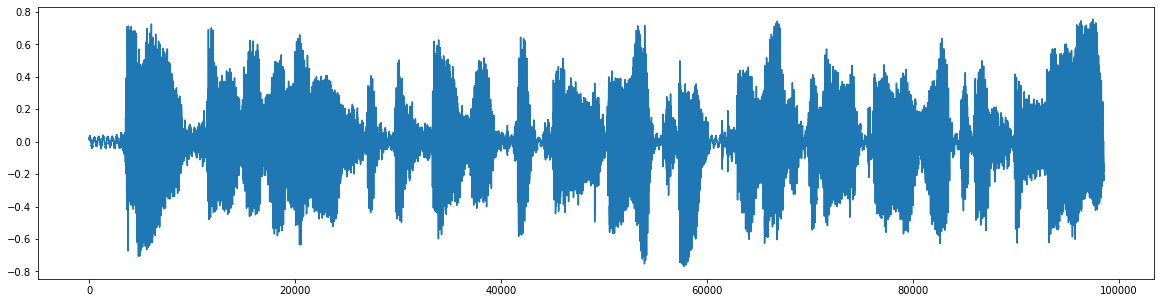

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(librosa_load)

In [32]:
# Resize
def resize_audio(audio: np.array, size: int) -> np.array:
        """
        This resizes all input audio to a fixed sample size.
        It helps us to have a consistent data shape

        Args:
            audio: This is the audio sample as a numpy array
        """
        resized = librosa.util.fix_length(audio, size, axis=1)
        print(f"Audio resized to {size} samples")
        return resized

In [26]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [27]:
#export data to csv and save as dataS.csv 
import csv
with open('../data_test/data_sw.csv', 'w') as f:
    for key in transcription.keys():
        f.write("%s,%s\n"%(key,transcription[key]))

### Data Augumentation Swahili

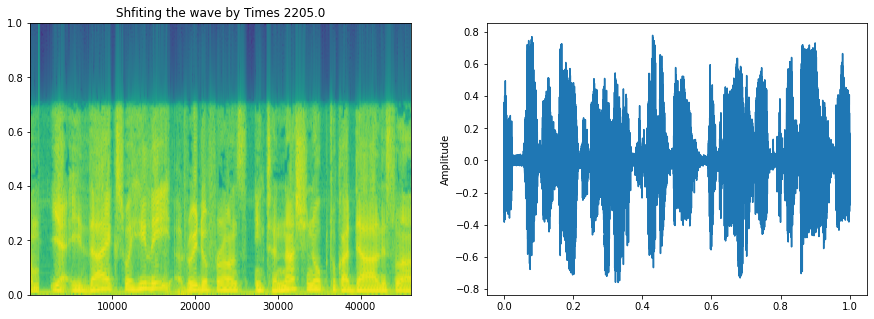

In [28]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/10))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)

(20, 181)


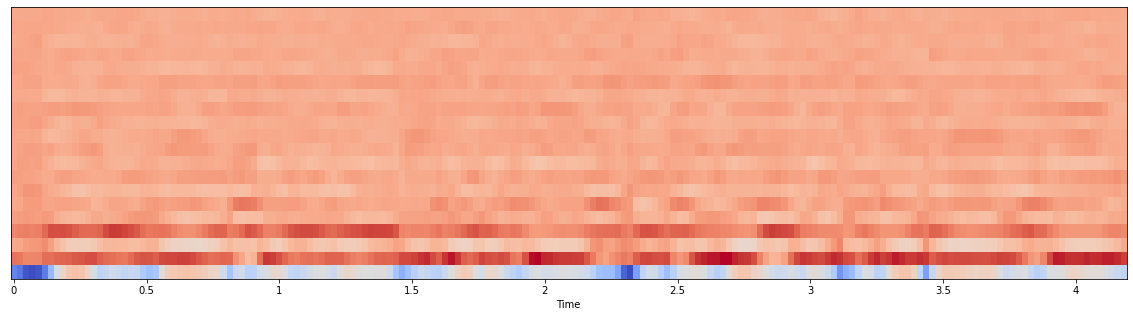

In [29]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [30]:
mata_data_path = '../dat_test/metadata.csv'

In [31]:
meta_data = pd.read_csv(mata_data_path)

FileNotFoundError: [Errno 2] No such file or directory: '../dat_test/metadata.csv'